In [1]:
import pandas as pd
from pathlib import Path

arquivos = Path("dados_emprestimos").iterdir()
dataframes = {}

for i, arquivo in enumerate(arquivos):
  tabela = pd.read_csv(arquivo)
  dataframes[f"tabela_{i}"] = tabela

lista_tabelas = [df for _, df in dataframes.items()]

### Concatenando os DataFrames

In [2]:
emprestimos = pd.concat(lista_tabelas)
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


### Verificando duplicatas

In [3]:
emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709704         2006021442     2010/01/17 18:56:43.923000000  2010/01/04 09:58:46.522000000  2010/02/01 13:59:02.528000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709705         2009032168     2010/01/17 18:56:43.909000000  2010/01/04 09:58:46.549000000  2010/01/20 13:14:34.464000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010/01/18 14:44:41.163000000  2010/01/04 09:21:19.099000000  2010/02/02 12:02:38.444000000  2.009047e+09        ALUNO DE GRADUAÇÃO        3
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    2
2461099        2012008348     2016/06/27 20:35:46.855000000  2016/06/14 11:20:33.254000000  2016/07/11 14:37:29.000000000  2.015022e+09        ALUNO D

### Excluindo duplicatas

In [4]:
emprestimos = emprestimos.drop_duplicates()
emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    1
2336122        2011033079     2016/11/21 02:01:58.488000000  2016/11/10 17:00:12.989000000  2016/12/02 14:21:49.000000000  2.016023e+09        ALUNO DE GRADUAÇÃO        1
2336103        2014085936     2016/11/25 19:25:36.215000000  2016/11/10 16:54:52.447000000  2016/12/13 14:30:52.000000000  2.014047e+09        ALUNO DE GRADUAÇÃO        1
2336104        2011027960     2016/11/23 17:27:54.642000000  2016/11/10 16:55:17.956000000  2016/11/28 10:32:38.000000000  2.016083e+09        ALUNO DE GRADUAÇÃO        1
2336105        2014000897     2016/12/02 15:02:53.356000000  2016/11/10 16:55:19.851000000  2016/12/23 13:53:23.000000000  2.014071e+09        ALUNO D

### Convertendo as datas para datetime

In [5]:
emprestimos['data_renovacao'] = pd.to_datetime(emprestimos['data_renovacao'])
emprestimos['data_emprestimo'] = pd.to_datetime(emprestimos['data_emprestimo'])
emprestimos['data_devolucao'] = pd.to_datetime(emprestimos['data_devolucao'])
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2257981 entries, 0 to 26560
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    float64       
 6   tipo_vinculo_usuario  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(2)
memory usage: 137.8+ MB


### Importando mais dados

In [6]:
dados_exemplares = pd.read_parquet("dados_exemplares.parquet")
dados_exemplares

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


### Unindo dataframes

In [7]:
emprestimos = emprestimos.merge(dados_exemplares)
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,91736


#### Os itens do acervo em uma biblioteca são organizados por um sistema de classificação de acordo com o respectivo tema. Existem diversos sistemas, mas este conjunto está de acordo com a CDU - Classificação Decimal Universal. Esta classificação é decimal, pois varia de acordo com a classe de cada assunto:

- 000 a 099: Generalidades. Ciência e conhecimento.
- 100 a 199: Filosofia e psicologia.
- 200 a 299: Religião.
- 300 a 399: Ciências sociais.
- 400 a 499: Classe vaga. Provisoriamente não ocupada.
- 500 a 599: Matemática e ciências naturais.
- 600 a 699: Ciências aplicadas.
- 700 a 799: Belas artes.
- 800 a 899: Linguagem. Língua. Linguística.
- 900 a 999: Geografia. Biografia. História.

### Atribuindo a coluna com nomenclatura da CDU

In [8]:
categorias = {"Generalidades": [000, 100], "Filosofia e psicologia": [100, 199], "Religião": [200, 299], "Ciências sociais": [300, 399], "Classe vaga": [400, 499],
              "Matemática e ciências naturais": [500, 599], "Ciências aplicadas": [600, 699], "Belas artes": [700, 799], "Linguagem. Língua. Linguística": [800, 899], 
              "Geografia. Biografia. História": [900, 999]}

for categoria, (min_val, max_val) in categorias.items():
    condicao = (emprestimos['localizacao'] >= min_val) & (emprestimos['localizacao'] <= max_val)
    emprestimos.loc[condicao, 'categoria'] = categoria

emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,categoria
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494,Ciências aplicadas
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,91736,Ciências aplicadas


### Excluindo a coluna "registro_sistema", já que ela não será útil. E modificando o tipo de dado da matrícula

In [9]:
emprestimos = emprestimos.drop(columns='registro_sistema')
emprestimos['matricula_ou_siape'] = emprestimos['matricula_ou_siape'].astype('string')
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,categoria
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


In [10]:
anos = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
emprestimos['id_emprestimo'].value_counts()

id_emprestimo
2772079     3
2010326     3
2014596     3
10240112    3
2595954     3
           ..
1523986     1
1523984     1
1523983     1
1523981     1
2989090     1
Name: count, Length: 2068724, dtype: int64

In [11]:
emprestimos.loc[emprestimos['id_emprestimo']==2772079]

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,categoria
1864848,2772079,2010082016,2018-12-03 16:05:57.708,2018-11-22 18:28:01.619,2018-12-11 17:54:14,20182022833.0,ALUNO DE PÓS-GRADUAÇÃO,1055570,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,670,Ciências aplicadas
1864849,2772079,2010082016,2018-12-03 16:05:57.708,2018-11-22 18:28:01.619,2018-12-11 17:54:14,20182022833.0,ALUNO DE PÓS-GRADUAÇÃO,1055922,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,693,Ciências aplicadas
1864850,2772079,2010082016,2018-12-03 16:05:57.708,2018-11-22 18:28:01.619,2018-12-11 17:54:14,20182022833.0,ALUNO DE PÓS-GRADUAÇÃO,1056360,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,389,Ciências sociais


#### Quantos empréstimos foram realizados ao total?

In [12]:
emprestimos_realizados = len(emprestimos['id_emprestimo'].drop_duplicates())
emprestimos_realizados

2068724

#### Quantos exemplares foram emprestados ao total?

In [13]:
emprestimos_exemplares = len(emprestimos)
emprestimos_exemplares

2072522

### Quantidade de exemplares emprestados por ano

In [14]:
emprestimos_data = pd.DataFrame(emprestimos['data_emprestimo'].value_counts()).reset_index()
emprestimos_data.columns = ['data', 'quantidade']
emprestimos_data

,data,quantidade
0,2015-06-10 18:51:56.994,3
1,2018-02-22 10:45:11.523,3
2,2014-01-28 14:49:50.505,3
3,2015-08-18 19:11:08.653,3
4,2014-07-14 15:35:51.822,3
...,...,...
2068686,2013-06-06 17:41:22.688,1
2068687,2013-06-06 17:40:06.074,1
2068688,2013-06-06 17:39:44.209,1
2068689,2013-06-06 17:34:42.071,1


In [15]:
emprestimos_ano = pd.DataFrame(emprestimos_data['quantidade'].groupby(emprestimos_data['data'].dt.year).sum())
emprestimos_ano.index.name = 'ano'
emprestimos_ano

,quantidade
ano,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


### Criando o gráfico

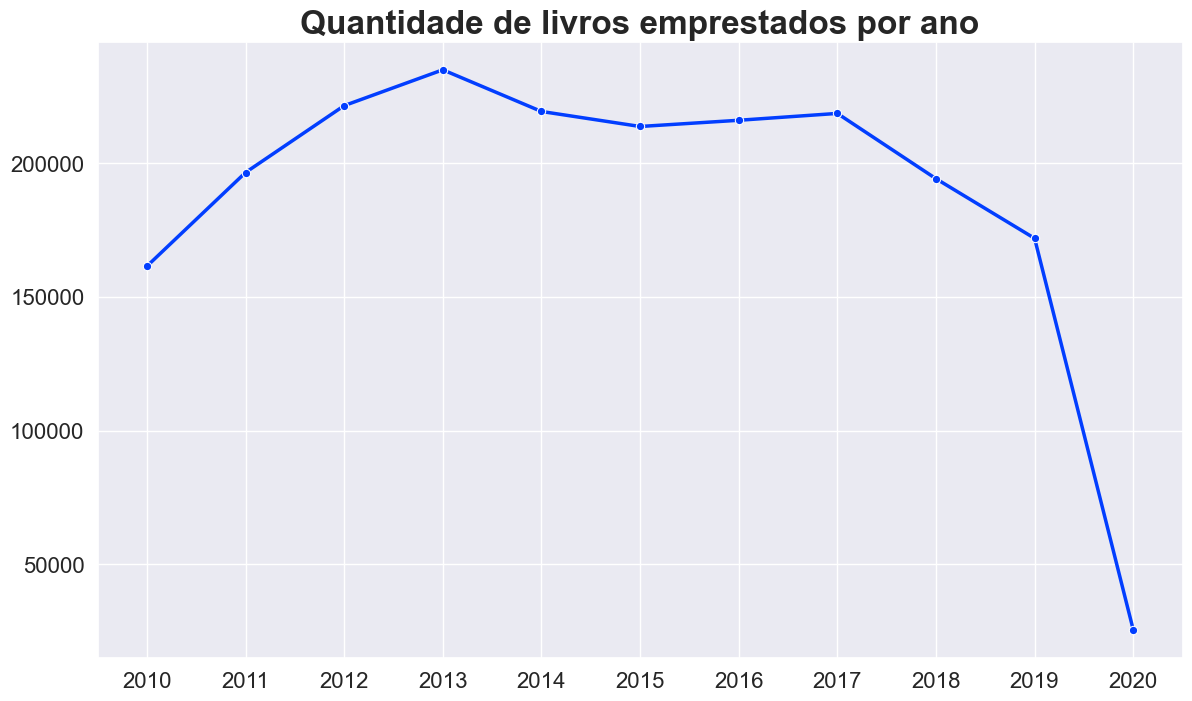

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='notebook', style='darkgrid', palette='bright', rc={'figure.figsize': (14, 8)})
g_ano = sns.lineplot(x='ano', y='quantidade', data=emprestimos_ano, marker='o', lw=2.5)
plt.tick_params(axis='both', labelsize=16)
g_ano.set_title("Quantidade de livros emprestados por ano", fontsize=24, fontweight='bold')
g_ano.set_xticks(emprestimos_ano.index)
g_ano.set(xlabel=None, ylabel=None)
plt.show()

Pode-ser perceber que desde 2013 os números de exemplares emprestados diminuindo, com uma queda bem grande em 2019.

O ano de 2020 não pode ser avaliado igual, devido ao período da quantidade de dados.

É importante a direção da biblioteca investigar o que está ocorrendo desde 2013 com os procedimentos realizados. Alguns questionamentos importantes que deve-se levar a direção, para que seja aprofundada em outra análise:

- O número de alunos da universidade vem diminuindo?
- Como está a pesquisa de satisfação dos usuários da biblioteca?
- O acervo está atualizado?
- Quais são as estratégias de marketing que a biblioteca está realizando?
- O que ocorreu de diferente em 2017 em relação a 2016 e 2015 para que o número tenha se elevado?
- E em 2019?

#### Quantos empréstimos foram realizados em cada mês?

In [17]:
emprestimos_mes = pd.DataFrame(emprestimos_data['quantidade'].groupby(emprestimos_data['data'].dt.month).sum())
emprestimos_mes = emprestimos_mes.reset_index(names='mes')
emprestimos_mes['mes'] = emprestimos_mes['mes'].replace({1: "jan", 2: "fev", 3: "mar", 4: "abr", 5: "mai", 6: "jun", 7: "jul", 8: "ago", 9: "set", 10: "out", 11: "nov", 12: "dez"})
emprestimos_mes

,mes,quantidade
0,jan,67514
1,fev,210200
2,mar,252185
3,abr,208725
4,mai,202530
5,jun,138123
6,jul,123790
7,ago,232793
8,set,208234
9,out,188410


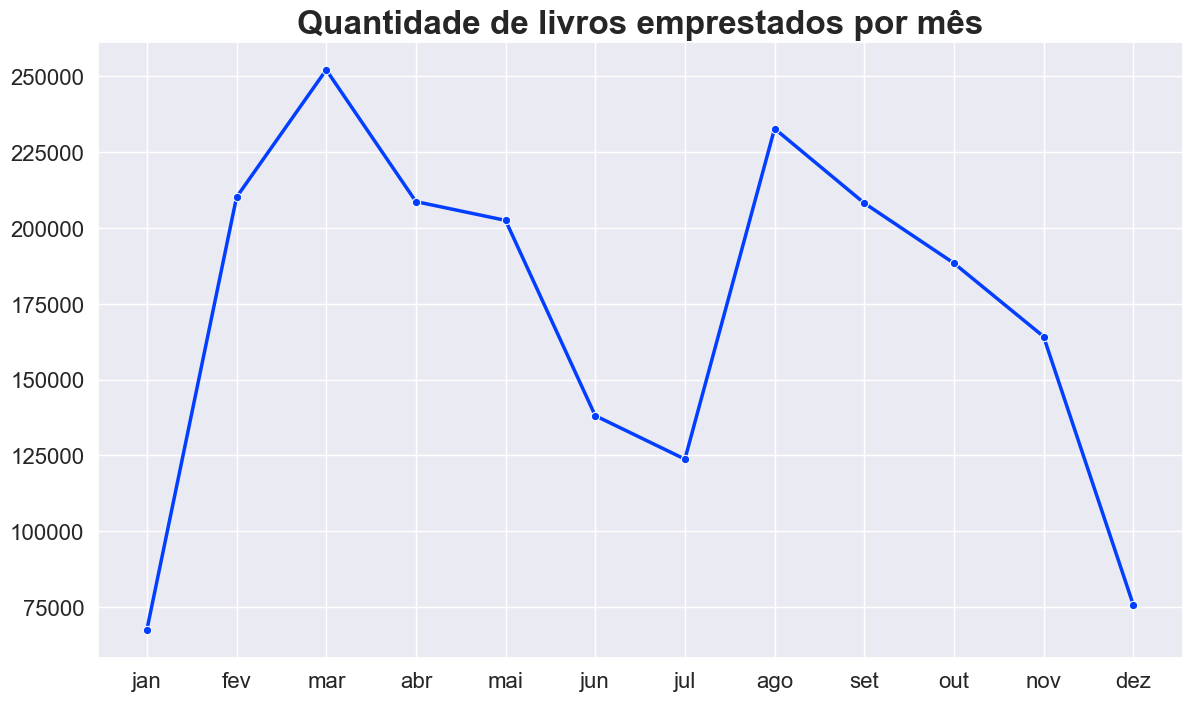

In [18]:
g_mes = sns.lineplot(x='mes', y='quantidade', data=emprestimos_mes, marker='o', lw=2.5)
g_mes.set(xlabel=None, ylabel=None)
plt.tick_params(axis='both', labelsize=16)
g_mes.set_title("Quantidade de livros emprestados por mês", fontsize=24, fontweight='bold')
plt.show()

Pode-se visualizar que os meses com maiores números de exemplares emprestados foram em março e agosto.

Por ser uma biblioteca universitária meses de férias como janeiro, julho e dezembro são os menores números.

O que não é nada de novo, entretanto caso todos os colaboradores saírem de férias durante esse período não conseguiríamos manter todo o funcionamento da biblioteca.

Principalmente com atividades de inventário que podem ocorrer anualmente ou de dois em dois anos e o melhor período seria de dezembro a janeiro.

Então meses como maio, junho, outubro e novembro podem ser uma opção a ser considerada pela direção da biblioteca.

Nota-se também a grande queda no mês de junho. Cabe aqui um alerta para se investigar mais, o que está ocorrendo e desenvolver estratégias e ações de marketing da biblioteca para que se aumente o número de exemplares emprestados.

Como por exemplo: uma ação para que sejam realizados empréstimos de livros para a leitura nas férias de julho.

#### Qual é a quantidade de empréstimos por hora ao longo do dia?

In [19]:
emprestimos_hora = pd.DataFrame(emprestimos_data['quantidade'].groupby(emprestimos_data['data'].dt.hour).sum())
emprestimos_hora.index.name = 'hora'
emprestimos_hora

,quantidade
hora,
0,17
6,14
7,18777
8,103416
9,131273
10,185839
11,180048
12,148754
13,126987


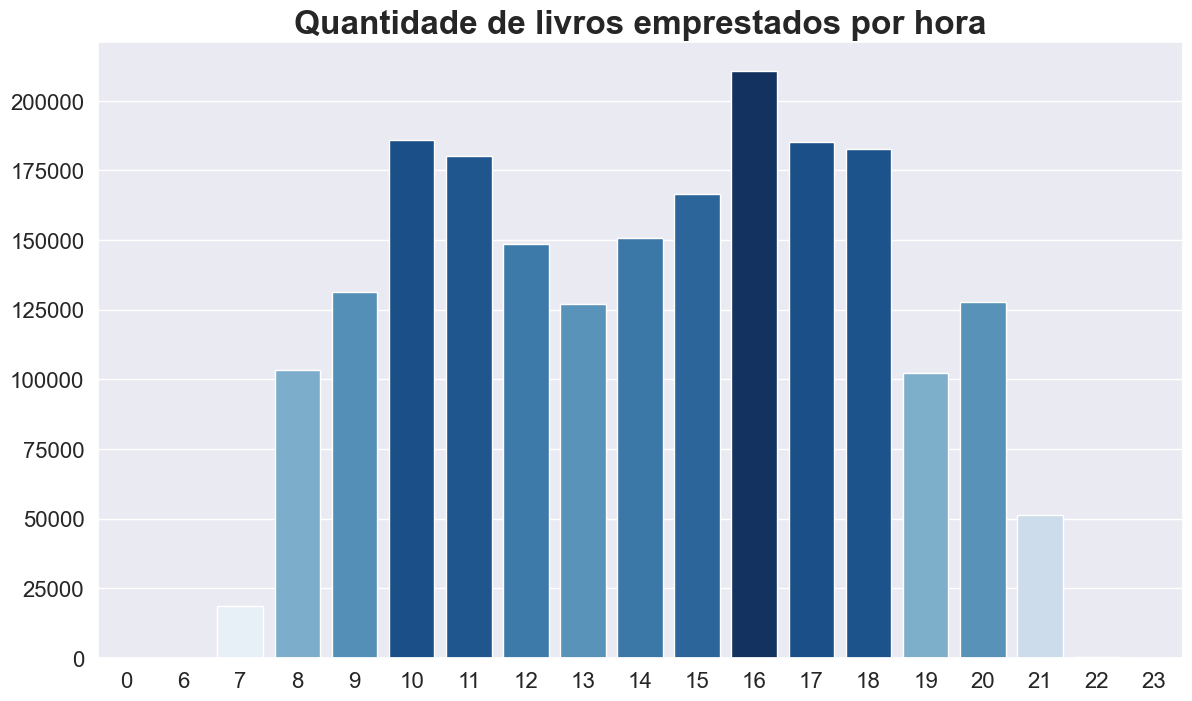

In [20]:
g_hora = sns.barplot(x='hora', y='quantidade', data=emprestimos_hora, palette='Blues', hue='quantidade')
plt.legend([], [], frameon=False)
g_hora.set(xlabel=None, ylabel=None)
plt.tick_params(axis='both', labelsize=16)
g_hora.set_title("Quantidade de livros emprestados por hora", fontsize=24, fontweight='bold')
plt.show()

Através do gráfico é possível identificar que os períodos das 10 h e 16 h são os de maior pico no atendimento de empréstimos.

Períodos do começo da manhã (entre 7h e 9) e da noite (entre 19h e 22) podem ser os melhores horários para que se realizem as demais atividades além do atendimento.

In [21]:
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,categoria
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


### Verificando valores únicos das variáveis

In [22]:
emprestimos['tipo_vinculo_usuario'].unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'SERVIDOR TÉCNICO-ADMINISTRATIVO', 'DOCENTE EXTERNO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

In [23]:
emprestimos['colecao'].unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [24]:
emprestimos['biblioteca'].unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [25]:
emprestimos['categoria'].unique()

array(['Ciências aplicadas', 'Linguagem. Língua. Linguística',
       'Ciências sociais', 'Geografia. Biografia. História',
       'Matemática e ciências naturais', 'Religião', 'Generalidades',
       'Filosofia e psicologia', 'Belas artes'], dtype=object)

#### Criando uma função para gerar uma tabela de frequência de acordo com a categoria passada

In [26]:
def frequencia(variavel):
  df = pd.DataFrame(emprestimos[variavel].value_counts())
  df.columns = ['quantidade']
  df['percentual'] = df['quantidade'] / df['quantidade'].sum()
  df['percentual'] = df['percentual'].map(lambda percentual: f"{percentual:.2%}")
  return df

#### Quantos foram por tipo de vinculo do usuario?

In [27]:
frequencia('tipo_vinculo_usuario')

,quantidade,percentual
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612324,77.80%
ALUNO DE PÓS-GRADUAÇÃO,302541,14.60%
DOCENTE,70981,3.42%
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.55%
ALUNO MÉDIO/TÉCNICO,28029,1.35%
DOCENTE EXTERNO,23949,1.16%
USUÁRIO EXTERNO,2509,0.12%
OUTROS,5,0.00%


O maior público da biblioteca são de fato os alunos de graduação com aproxidamente 78% o segundo maior público é o de pós graduação com aproximadamente 15%.

Vale lembrar que esta é apenas uma métrica geral a partir dos exemplares emprestados.

Possilvemente a maior diferença entre os percentuais dos dois anteriores é devido a dois pontos:

- Alunos de pós graduação, tem o maior enfoque em artigos científicos que são acessados através de bases de dados bibliográficas.
- A maior quantidade de alunos de graduação em comparação com os da pós na universidade.

### Quantos foram por coleção?

In [28]:
frequencia('colecao')

,quantidade,percentual
colecao,,
Acervo Circulante,2053120,99.06%
Multimeios,7954,0.38%
Monografias,4021,0.19%
Dissertações,2406,0.12%
Obras de Referência,1954,0.09%
Publicações de Autores do RN,866,0.04%
Publicações da UFRN,764,0.04%
Teses,714,0.03%
Folhetos,271,0.01%


A principal coleção é a própria circulante o que se cria um alerta, pois está com 99% de todos os exemplares empréstados.

Principalmente para as monografias, dissertações e teses que poderiam estar sendo mais consultadas para que haja um crescimento das discussões de pesquisa interna da instituição.

Entretanto é importante verificar se esses documentos não estão disponíveis na coleção online e por este motivo não é emprestada fisicamente.

As coleções: Coleção Mossoroense, Coleção Zila Mamede, Literatura de Cordel, Obras Raras devem ter uma atenção especial em entender a razão que estão com números tão pequenos de frequência.

### Quantos foram por biblioteca?

In [29]:
frequencia('biblioteca')

,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.81%
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.72%
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.74%
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.21%
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,2.97%
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.22%
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,1.97%
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.55%
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.40%


Pelo tamanho da biblioteca central era de se esperar que houvesse uma maior predominância dela.

Este ranking é importante para se entender o contexto geral do sistema de bibliotecas, entretanto para que se enriqueça ainda mais essa análise se faz necessário uma avaliação interna de outras métricas, como:

- A quantidade esperada de empréstimos.
- Quantidade de empréstimos por usuário cadastrado em cada biblioteca.
- Ações e investimentos realizados em cada uma.

### Quantos foram pela categoria?

In [30]:
frequencia("categoria")

,quantidade,percentual
categoria,,
Ciências aplicadas,1425473,68.78%
Ciências sociais,369536,17.83%
Matemática e ciências naturais,68744,3.32%
Generalidades,62521,3.02%
Religião,62295,3.01%
Filosofia e psicologia,60563,2.92%
Geografia. Biografia. História,7989,0.39%
Belas artes,7911,0.38%
Linguagem. Língua. Linguística,7490,0.36%


De maneira geral podemos observar que há uma grande diferença entre os temas.

Será importante entender a razão de materiais do tema de Geografia/Biografia/História, Belas artes e Linguagem estão com números tão baixos.

Algumas questões surgem:

- O acervo está atualizado?
- O público da biblioteca tem a necessidade destas informações? Se sim, por que não estão usando?
- Quais ações de marketing estão sendo realizadas para esses temas?

### Filtrando os emprestimos realizados por alunos de graduação e da coleção acervo circulante

In [31]:
emprestimos_graduacao = emprestimos.loc[emprestimos['tipo_vinculo_usuario']=="ALUNO DE GRADUAÇÃO", :]
emprestimos_graduacao = emprestimos_graduacao.loc[emprestimos['colecao']=="Acervo Circulante", :]
emprestimos_graduacao.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,categoria
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas
5,709689,L157395,2010-01-19 15:59:26.447,2010-01-04 08:27:33.596,2010-02-03 13:06:43.125,2009045971.0,ALUNO DE GRADUAÇÃO,57040,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,698,Ciências aplicadas


In [32]:
emprestimos_graduacao['colecao'].value_counts()

colecao
Acervo Circulante    1600155
Name: count, dtype: int64

### Filtrando os emprestimos realizados por alunos de pós graduação e da coleção acervo circulante

In [33]:
emprestimos_pos_graduacao = emprestimos.loc[emprestimos['tipo_vinculo_usuario']=="ALUNO DE PÓS-GRADUAÇÃO", :]
emprestimos_pos_graduacao = emprestimos_pos_graduacao.loc[emprestimos['colecao']=="Acervo Circulante", :]
emprestimos_pos_graduacao.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,categoria
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
24,709709,2009011815,2010-02-03 12:58:49.734,2010-01-04 10:02:59.828,2010-03-02 16:38:38.231,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,265828,Acervo Circulante,Biblioteca Setorial Prof. Alberto Moreira Camp...,REGULAR,620,Ciências aplicadas
28,709713,2008010513,NaT,2010-01-04 10:23:39.830,2010-01-05 11:57:06.156,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,190443,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,656,Ciências aplicadas
29,709714,2008046332,NaT,2010-01-04 10:23:39.859,2010-01-05 11:57:01.461,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,256856,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,619,Ciências aplicadas
42,709727,2007032237,NaT,2010-01-04 10:56:34.814,2010-01-28 11:12:34.011,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,228451,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,692,Ciências aplicadas


### Criando tabela com a quantidade de empréstimos mensais realizados por ano para os alunos de graduação

In [34]:
emprestimos_grad = pd.DataFrame(emprestimos_graduacao['id_emprestimo'].groupby([emprestimos_graduacao['data_emprestimo'].dt.year, emprestimos_graduacao['data_emprestimo'].dt.month]).count())
emprestimos_grad.columns = ["emprestimos"]
emprestimos_grad = emprestimos_grad.reset_index(names=["ano", "mes"])
emprestimos_grad['mes'] = emprestimos_grad['mes'].replace({1: "jan", 2: "fev", 3: "mar", 4: "abr", 5: "mai", 6: "jun", 7: "jul", 8: "ago", 9: "set", 10: "out", 11: "nov", 12: "dez"})
emprestimos_grad

,ano,mes,emprestimos
0,2010,jan,2996
1,2010,fev,7769
2,2010,mar,15275
3,2010,abr,12430
4,2010,mai,12164
...,...,...,...
118,2019,nov,8807
119,2019,dez,1980
120,2020,jan,1781
121,2020,fev,8138


### Criando tabela com a quantidade de empréstimos mensais realizados por ano para os alunos de pós graduação

In [35]:
emprestimos_pos_grad = pd.DataFrame(emprestimos_pos_graduacao['id_emprestimo'].groupby([emprestimos_pos_graduacao['data_emprestimo'].dt.year, emprestimos_pos_graduacao['data_emprestimo'].dt.month]).count())
emprestimos_pos_grad.columns = ["emprestimos"]
emprestimos_pos_grad = emprestimos_pos_grad.reset_index(names=["ano", "mes"])
emprestimos_pos_grad['mes'] = emprestimos_pos_grad['mes'].replace({1: "jan", 2: "fev", 3: "mar", 4: "abr", 5: "mai", 6: "jun", 7: "jul", 8: "ago", 9: "set", 10: "out", 11: "nov", 12: "dez"})
emprestimos_pos_grad

,ano,mes,emprestimos
0,2010,jan,1105
1,2010,fev,1474
2,2010,mar,2919
3,2010,abr,2716
4,2010,mai,2514
...,...,...,...
119,2019,dez,1069
120,2020,jan,1143
121,2020,fev,1189
122,2020,mar,1471


### Análisando com o boxplot

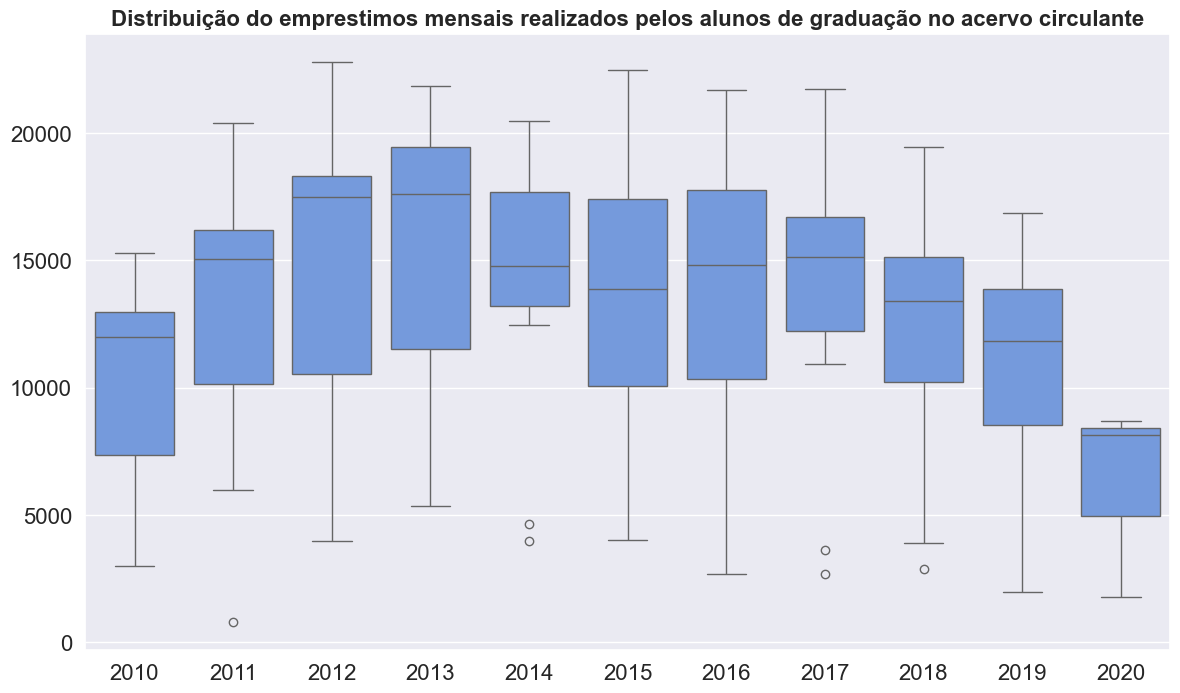

In [36]:
bp_graduacao = sns.boxplot(data=emprestimos_grad, x='ano', y='emprestimos', color='cornflowerblue')
bp_graduacao.set(xlabel=None, ylabel=None)
plt.tick_params(axis='both', labelsize=16)
bp_graduacao.set_title("Distribuição do emprestimos mensais realizados pelos alunos de graduação no acervo circulante", fontweight='bold', fontsize=16)
plt.show()

É importante ressaltar que esse recorte, reflete grande parte da estrutura geral do conjunto de dados, pois são os tipos de usuários com maior frequência (alunos de graduação) e da coleção mais utilizada por eles (acervo circulante).

Com o boxplot é possível observar a oscilação da quantidade de empréstimos realizados mensalmente durante cada ano.

Além da análise geral realizada (declínio a partir de 2013, forte baixa em 2019), chama atenção os anos de 2014 e 2017. Que se excluíssemos os outliers (possivelmente meses de janeiro e dezembro) teríamos anos com uma quantidade constante de empréstimos mensais.

Mas se diferenciam principalmente porque em 2014 houve um declínio e em 2017 houve um aumento, em relação aos anos anteriores. Seria interessante entender com a direção das bibliotecas o que ocorreu nessas datas para que pudéssemos ter um contexto melhor da realidade do negócio.

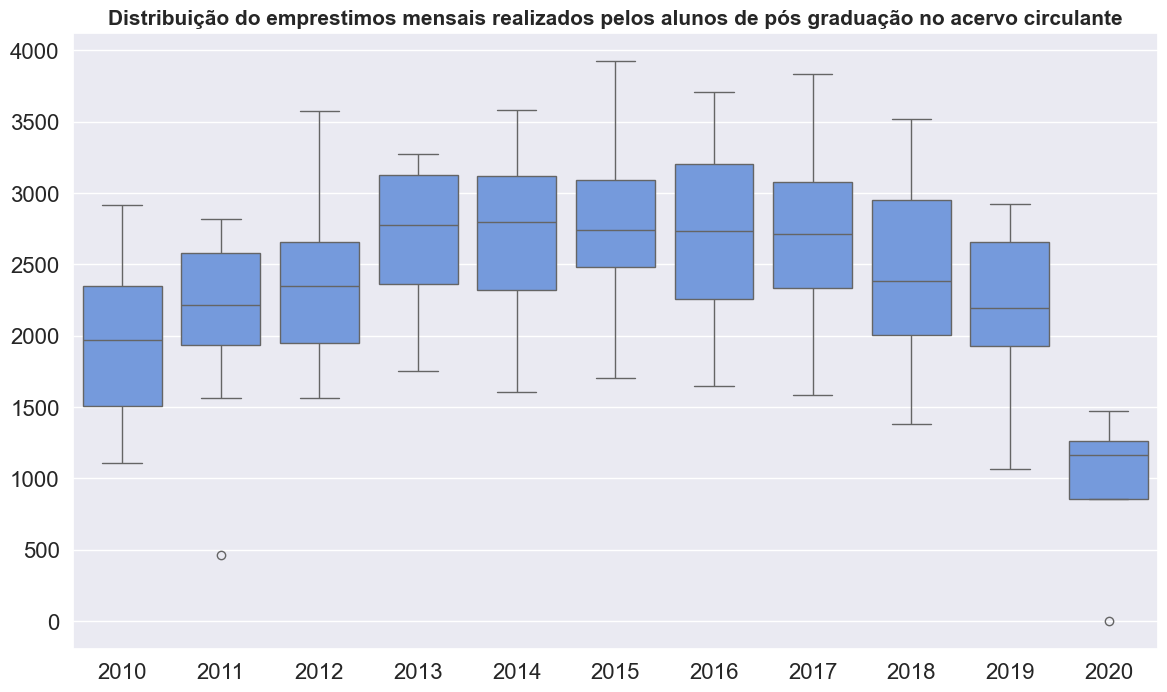

In [37]:
bp_pos_graduacao = sns.boxplot(data=emprestimos_pos_grad, x='ano', y='emprestimos', color='cornflowerblue')
bp_pos_graduacao.set(xlabel=None, ylabel=None)
plt.tick_params(axis='both', labelsize=16)
bp_pos_graduacao.set_title("Distribuição do emprestimos mensais realizados pelos alunos de pós graduação no acervo circulante", fontweight='bold', fontsize=15)
plt.show()

Já os alunos de pós graduação tiveram um aspecto diferente em relação ao declínio a partir de 2013:

- A linha mediana foi diminuindo devagar até 2018. Entretanto valores máximos foram superiores, apenas caindo de fato em 2019.

Nos dois gráficos podemos observar um grande aumento entre 2010 e 2013, o que nos leva a pensar em quais procedimentos estavam sendo realizados neste período para que houvesse esse crescimento.

Nos dois recortes visualizamos que a partir de 2018 tivemos um forte declínio e é um alerta para que a direção possa entender o que está ocorrendo.

## Importando novos dados

In [38]:
from io import StringIO

cadastro_alunos_json = pd.read_json('cadastro_alunos.json')
json_string = cadastro_alunos_json.registros[0]
json_io = StringIO(json_string)
cadastro_usuarios_json = pd.read_json(json_io)
cadastro_usuarios_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [39]:
cadastro_usuarios_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  int64 
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [40]:
cadastro_usuarios_json['matricula_ou_siape'] = cadastro_usuarios_json['matricula_ou_siape'].astype('float')
cadastro_usuarios_json['matricula_ou_siape'] = cadastro_usuarios_json['matricula_ou_siape'].astype('string')
cadastro_usuarios_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  string
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: object(2), string(1)
memory usage: 1.4+ MB


In [41]:
matricula_alunos_ate_2010 = pd.read_excel("matricula_alunos.xlsx", sheet_name='Até 2010')
matricula_alunos_ate_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
matricula_alunos_ate_2010 = matricula_alunos_ate_2010[1:]
matricula_alunos_ate_2010

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
5,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7722,2009075211.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7723,2009075249.0,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7724,2009075294.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7725,2009075300.0,ALUNO DE GRADUAÇÃO,MÚSICA


In [42]:
matricula_alunos_ate_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7726 entries, 1 to 7726
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    7726 non-null   object
 1   tipo_vinculo_usuario  7726 non-null   object
 2   curso                 7726 non-null   object
dtypes: object(3)
memory usage: 181.2+ KB


In [43]:
matricula_alunos_depois_2010 = pd.read_excel("matricula_alunos.xlsx", sheet_name='Após 2010')
matricula_alunos_depois_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
matricula_alunos_depois_2010 = matricula_alunos_depois_2010[1:]
matricula_alunos_depois_2010

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO
2,2010000035.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
3,2010001290.0,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
4,2010002849.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
5,2010003381.0,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2270,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
2271,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
2272,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2273,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [44]:
matricula_alunos_excel = pd.concat([matricula_alunos_ate_2010, matricula_alunos_depois_2010])
matricula_alunos_excel['matricula_ou_siape'] = matricula_alunos_excel['matricula_ou_siape'].astype('string')
matricula_alunos_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
5,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
2270,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
2271,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
2272,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2273,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


### Concatenando arquivos Excel e JSON

In [45]:
cadastro_usuarios = pd.concat([matricula_alunos_excel, cadastro_usuarios_json], ignore_index=True)
cadastro_usuarios

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


### Empréstimos dos alunos de graduação de 2015 em diante

In [46]:
matricula_data_emprestimo = emprestimos.loc[emprestimos['tipo_vinculo_usuario']== 'ALUNO DE GRADUAÇÃO', :]
matricula_data_emprestimo = matricula_data_emprestimo.loc[:, ['matricula_ou_siape', 'data_emprestimo']]
matricula_data_emprestimo = matricula_data_emprestimo.loc[matricula_data_emprestimo['data_emprestimo'].dt.year >= 2015, :]
matricula_data_emprestimo = matricula_data_emprestimo.reset_index(drop=True)
matricula_data_emprestimo

,matricula_ou_siape,data_emprestimo
0,2013021576.0,2015-01-02 09:16:49.566
1,2014026648.0,2015-01-02 09:44:42.808
2,2014026648.0,2015-01-02 09:44:43.127
3,2010049586.0,2015-01-02 10:11:09.837
4,2014021454.0,2015-01-02 10:19:38.087
...,...,...
788099,20190154579.0,2020-03-18 16:26:20.477
788100,20160129109.0,2020-03-18 16:41:28.500
788101,20160129109.0,2020-03-18 16:41:28.588
788102,20160129109.0,2020-03-18 16:41:28.662


### Verificando valores nulos

In [47]:
display(matricula_data_emprestimo.isna().sum())
display(cadastro_usuarios.isna().sum())

matricula_ou_siape    94
data_emprestimo        0
dtype: int64

matricula_ou_siape      0
tipo_vinculo_usuario    0
curso                   0
dtype: int64

### Excluindo valores nulos de matricula

In [48]:
matricula_data_emprestimo = matricula_data_emprestimo.dropna()
matricula_data_emprestimo.isna().sum()

matricula_ou_siape    0
data_emprestimo       0
dtype: int64

### Filtrando os curso selecionados

In [49]:
cadastro_usuarios_cursos = cadastro_usuarios.query("curso == ['BIBLIOTECONOMIA', 'CIÊNCIAS SOCIAIS', 'COMUNICAÇÃO SOCIAL', 'DIREITO', 'FILOSOFIA', 'PEDAGOGIA']")
display(cadastro_usuarios_cursos)
display(matricula_data_emprestimo)

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


,matricula_ou_siape,data_emprestimo
0,2013021576.0,2015-01-02 09:16:49.566
1,2014026648.0,2015-01-02 09:44:42.808
2,2014026648.0,2015-01-02 09:44:43.127
3,2010049586.0,2015-01-02 10:11:09.837
4,2014021454.0,2015-01-02 10:19:38.087
...,...,...
788099,20190154579.0,2020-03-18 16:26:20.477
788100,20160129109.0,2020-03-18 16:41:28.500
788101,20160129109.0,2020-03-18 16:41:28.588
788102,20160129109.0,2020-03-18 16:41:28.662


### Unir DataFrames de cadastro de usuários com o de empréstimos

In [50]:
cadastro_usuarios_cursos_selecionados = matricula_data_emprestimo.merge(cadastro_usuarios_cursos)
cadastro_usuarios_cursos_selecionados

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,2014021454.0,2015-01-02 10:19:38.087,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,2013018187.0,2015-01-02 10:25:40.883,ALUNO DE GRADUAÇÃO,DIREITO
2,2014029499.0,2015-01-02 12:26:43.571,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
3,2014029499.0,2015-01-02 12:26:43.840,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
4,2014029499.0,2015-01-02 12:26:44.750,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
...,...,...,...,...
212833,20200090284.0,2020-03-17 20:23:54.966,ALUNO DE GRADUAÇÃO,DIREITO
212834,20180113385.0,2020-03-17 21:20:47.278,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
212835,20190150079.0,2020-03-18 13:43:53.220,ALUNO DE GRADUAÇÃO,PEDAGOGIA
212836,20190150079.0,2020-03-18 13:43:53.389,ALUNO DE GRADUAÇÃO,PEDAGOGIA


### Verificando a quantiade de empréstimos realizados por ano pelos cursos selecionados

In [51]:
cadastro_usuarios_cursos_selecionados_emprestimos = pd.DataFrame(cadastro_usuarios_cursos_selecionados.groupby([cadastro_usuarios_cursos_selecionados['curso'], 
                                                                                                               cadastro_usuarios_cursos_selecionados['data_emprestimo'].dt.year]).count())
cadastro_usuarios_cursos_selecionados_emprestimos = cadastro_usuarios_cursos_selecionados_emprestimos.drop(columns=['matricula_ou_siape', 'tipo_vinculo_usuario'])
cadastro_usuarios_cursos_selecionados_emprestimos.columns = ['emprestimos']
cadastro_usuarios_cursos_selecionados_emprestimos = cadastro_usuarios_cursos_selecionados_emprestimos.reset_index()
cadastro_usuarios_cursos_selecionados_emprestimos.columns = ['curso', 'ano', 'emprestimos']
cadastro_usuarios_cursos_selecionados_emprestimos

,curso,ano,emprestimos
0,BIBLIOTECONOMIA,2015,7784
1,BIBLIOTECONOMIA,2016,7044
2,BIBLIOTECONOMIA,2017,7307
3,BIBLIOTECONOMIA,2018,6378
4,BIBLIOTECONOMIA,2019,5889
5,BIBLIOTECONOMIA,2020,900
6,CIÊNCIAS SOCIAIS,2015,7489
7,CIÊNCIAS SOCIAIS,2016,6978
8,CIÊNCIAS SOCIAIS,2017,6918
9,CIÊNCIAS SOCIAIS,2018,6181


### Tabela pivotada

In [52]:
cursos_selecionados_emprestimos_pivot = pd.pivot_table(cadastro_usuarios_cursos_selecionados_emprestimos, 
                                                       index='curso', columns='ano', values='emprestimos', margins=True, aggfunc='sum', margins_name='Total')
cursos_selecionados_emprestimos_pivot

ano,2015,2016,2017,2018,2019,2020,Total
curso,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
Total,44224,44087,45186,39353,34864,5124,212838


### Importando outros dados

In [53]:
matricula_alunos_ate_2010_2 = pd.read_excel("matricula_alunos.xlsx", sheet_name='Até 2010')
matricula_alunos_ate_2010_2.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
matricula_alunos_ate_2010_2 = matricula_alunos_ate_2010_2[1:]

matricula_alunos_depois_2010_2 = pd.read_excel("matricula_alunos.xlsx", sheet_name='Após 2010')
matricula_alunos_depois_2010_2.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
matricula_alunos_depois_2010_2 = matricula_alunos_depois_2010_2[1:]

matricula_alunos_excel_2 = pd.concat([matricula_alunos_ate_2010_2, matricula_alunos_depois_2010_2])
matricula_alunos_excel_2['matricula_ou_siape'] = matricula_alunos_excel_2['matricula_ou_siape'].astype('string')
matricula_alunos_excel_2

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
5,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
2270,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
2271,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
2272,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2273,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


### Pegando apenas os de pós graduação

In [54]:
cadastro_usuarios_json_2 = pd.read_json('cadastro_alunos.json')
json_string = cadastro_usuarios_json_2.registros[1]
json_io = StringIO(json_string)
cadastro_usuarios_json_2 = pd.read_json(json_io)
cadastro_usuarios_json_2['matricula_ou_siape'] = cadastro_usuarios_json_2['matricula_ou_siape'].astype('float').astype('string')
display(cadastro_usuarios_json_2)
display(cadastro_usuarios_json_2.isna().sum())


,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


matricula_ou_siape      0
tipo_vinculo_usuario    0
curso                   0
dtype: int64

In [55]:
cadastro_usuarios_2 = pd.concat([cadastro_usuarios_json_2, matricula_alunos_excel_2], ignore_index=True)
cadastro_usuarios_2

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
29435,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
29436,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
29437,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
29438,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [56]:
cadastro_usuarios_pos_graduacao = cadastro_usuarios_2.loc[cadastro_usuarios_2['tipo_vinculo_usuario']=="ALUNO DE PÓS-GRADUAÇÃO", :]
cadastro_usuarios_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


### Filtrando empréstimos desde 2017

In [57]:
matricula_data_emprestimo_2 = emprestimos.loc[emprestimos['tipo_vinculo_usuario']== 'ALUNO DE PÓS-GRADUAÇÃO', :]
matricula_data_emprestimo_2 = matricula_data_emprestimo_2.loc[:, ['matricula_ou_siape', 'data_emprestimo']]
matricula_data_emprestimo_2 = matricula_data_emprestimo_2.loc[matricula_data_emprestimo_2['data_emprestimo'].dt.year >= 2017, :]
matricula_data_emprestimo_2 = matricula_data_emprestimo_2.reset_index(drop=True)
matricula_data_emprestimo_2

,matricula_ou_siape,data_emprestimo
0,20161011168.0,2017-01-02 08:29:46.722
1,20161011168.0,2017-01-02 08:29:46.794
2,20161011168.0,2017-01-02 08:46:42.991
3,20161011168.0,2017-01-02 08:46:43.400
4,20161013903.0,2017-01-02 09:41:45.823
...,...,...
92118,20191017055.0,2020-03-19 14:41:57.754
92119,20191017055.0,2020-03-19 14:42:56.670
92120,20191017055.0,2020-03-19 14:43:40.666
92121,20201014993.0,2020-06-09 11:54:02.669


In [58]:
cadastro_usuarios_pos_graduacao = cadastro_usuarios_pos_graduacao.merge(matricula_data_emprestimo_2)
cadastro_usuarios_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso,data_emprestimo
0,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017-01-03 10:13:43.790
1,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017-01-03 10:13:43.849
2,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017-01-03 10:13:43.904
3,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017-05-19 18:43:25.222
4,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017-05-19 18:43:25.254
...,...,...,...,...
92057,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE,2020-03-17 18:00:15.993
92058,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE,2020-03-17 18:00:16.034
92059,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN,2020-03-17 18:06:06.974
92060,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN,2020-06-09 11:54:02.669


In [59]:
emprestimos_pos_graduacao_desde_2017 = pd.DataFrame(cadastro_usuarios_pos_graduacao.groupby([cadastro_usuarios_pos_graduacao['curso'], 
                                                                                                               cadastro_usuarios_pos_graduacao['data_emprestimo'].dt.year]).count())
emprestimos_pos_graduacao_desde_2017 = emprestimos_pos_graduacao_desde_2017.drop(columns=['matricula_ou_siape', 'tipo_vinculo_usuario'])
emprestimos_pos_graduacao_desde_2017.columns = ['emprestimos']
emprestimos_pos_graduacao_desde_2017 = emprestimos_pos_graduacao_desde_2017.reset_index()
emprestimos_pos_graduacao_desde_2017.columns = ['curso', 'ano', 'emprestimos']
emprestimos_pos_graduacao_desde_2017

,curso,ano,emprestimos
0,ADMINISTRAÇÃO,2017,2538
1,ADMINISTRAÇÃO,2018,2316
2,ADMINISTRAÇÃO,2019,1692
3,ADMINISTRAÇÃO,2020,269
4,ARQUITETURA E URBANISMO,2017,2209
5,ARQUITETURA E URBANISMO,2018,1917
6,ARQUITETURA E URBANISMO,2019,1818
7,ARQUITETURA E URBANISMO,2020,257
8,ARTES CÊNICAS,2017,2115
9,ARTES CÊNICAS,2018,2082


In [60]:
emprestimos_pos_graduacao_desde_2017_pivot = pd.pivot_table(emprestimos_pos_graduacao_desde_2017, index='curso', columns='ano', values='emprestimos')
emprestimos_pos_graduacao_desde_2017_pivot

ano,2017,2018,2019,2020
curso,,,,
ADMINISTRAÇÃO,2538.0,2316.0,1692.0,269.0
ARQUITETURA E URBANISMO,2209.0,1917.0,1818.0,257.0
ARTES CÊNICAS,2115.0,2082.0,1812.0,229.0
BIOINFORMÁTICA,2190.0,1914.0,1825.0,263.0
BIOQUÍMICA,2294.0,1944.0,2057.0,272.0
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316.0,2110.0,2008.0,328.0
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415.0,2365.0,2026.0,303.0
CIÊNCIAS DA SAÚDE,2434.0,1986.0,1825.0,234.0
CIÊNCIAS ODONTOLÓGICAS,2414.0,2540.0,2134.0,352.0


### Importando dados da previsão

In [61]:
previsao_2022 = pd.read_table('previsao.txt')
previsao_2022

,curso previsao_2022
0,administracao 1905
1,arquitetura_e_urbanismo 1896
2,artes_cenicas 1920
3,bioinformatica 2302
4,bioquimica 2090
5,ciencia_e_engenharia_de_materiais 2010
6,ciencia_tecnologia_e_inovacao 1960
7,ciencias_da_saude 1730
8,ciencias_odontologicas 2405
9,design 1900


In [62]:
previsao_2022 = previsao_2022['curso previsao_2022'].str.split(' ', expand=True)
previsao_2022

,0,1
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [63]:
emprestimos2022 = [emprestimo for emprestimo in previsao_2022[1]]
emprestimos_pos_graduacao_desde_2017_pivot['2022'] = emprestimos2022
emprestimos_pos_graduacao_desde_2017_pivot = emprestimos_pos_graduacao_desde_2017_pivot.astype(int)
emprestimos_pos_graduacao_desde_2017_pivot

ano,2017,2018,2019,2020,2022
curso,,,,,
ADMINISTRAÇÃO,2538,2316,1692,269,1905
ARQUITETURA E URBANISMO,2209,1917,1818,257,1896
ARTES CÊNICAS,2115,2082,1812,229,1920
BIOINFORMÁTICA,2190,1914,1825,263,2302
BIOQUÍMICA,2294,1944,2057,272,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303,1960
CIÊNCIAS DA SAÚDE,2434,1986,1825,234,1730
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352,2405


### Criando DataFrame com as diferenças percentuais para cada ano

In [64]:
def percentual(ano1, ano2):
  percentual = round((ano1 / ano2 * 100) - 100, 2)
  return percentual

percentual2018 = percentual(emprestimos_pos_graduacao_desde_2017_pivot.iloc[:, 1], emprestimos_pos_graduacao_desde_2017_pivot.iloc[:, 0])
percentual2019 = percentual(emprestimos_pos_graduacao_desde_2017_pivot.iloc[:, 2], emprestimos_pos_graduacao_desde_2017_pivot.iloc[:, 1])
percentual2022 = percentual(emprestimos_pos_graduacao_desde_2017_pivot.iloc[:, 4], emprestimos_pos_graduacao_desde_2017_pivot.iloc[:, 2])

percentuais = pd.DataFrame({2018: percentual2018, 2019: percentual2019, 2022: percentual2022})
percentuais = percentuais.map(lambda n: f"{n}%")
percentuais

,2018,2019,2022
curso,,,
ADMINISTRAÇÃO,-8.75%,-26.94%,12.59%
ARQUITETURA E URBANISMO,-13.22%,-5.16%,4.29%
ARTES CÊNICAS,-1.56%,-12.97%,5.96%
BIOINFORMÁTICA,-12.6%,-4.65%,26.14%
BIOQUÍMICA,-15.26%,5.81%,1.6%
CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89%,-4.83%,0.1%
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07%,-14.33%,-3.26%
CIÊNCIAS DA SAÚDE,-18.41%,-8.11%,-5.21%
CIÊNCIAS ODONTOLÓGICAS,5.22%,-15.98%,12.7%
